# WeatherPy 
_____________________________

## Analysis - Generate Random Geographic Coordinates and a List of Cities

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [7]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [9]:
url = "https://api.openweathermap.org/data/2.5/weather"

city_data = []

print("Beginning Data Retrieval         ")
print("---------------------------------")

record_count = 1
set_count = 1

for i, city in enumerate(cities):
    if(i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    
    city_url = f"{url}?q={city}&appid={weather_api_key}"

    print("Processing Record %s of Set %s | %s" %(record_count,set_count, city))

    record_count += 1

    try:
        response = requests.get(city_url)
        response.raise_for_status()
        city_weather = response.json() 

        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    
    except:
        print("City not found. Skipping...")
        pass

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


        

Beginning Data Retrieval         
---------------------------------
Processing Record 1 of Set 1 | sinabang
Processing Record 2 of Set 1 | carnarvon
Processing Record 3 of Set 1 | isafjordur
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | palmer
Processing Record 6 of Set 1 | papatowai
Processing Record 7 of Set 1 | masterton
Processing Record 8 of Set 1 | colonia
Processing Record 9 of Set 1 | aasiaat
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | teguise
Processing Record 12 of Set 1 | hawaiian paradise park
Processing Record 13 of Set 1 | kirakira
Processing Record 14 of Set 1 | edinburgh of the seven seas
Processing Record 15 of Set 1 | udachny
Processing Record 16 of Set 1 | la carlota
Processing Record 17 of Set 1 | dehloran
Processing Record 18 of Set 1 | invercargill
Processing Record 19 of Set 1 | anadyr
Processing Record 20 of Set 1 | saipan
Processing Record 21 of Set 1 | bullas
Processing Record 22 of Set 1 | kailua

In [10]:
city_data_df = pd.DataFrame(city_data)

city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [11]:
city_data_df["Max Temp"] = city_data_df["Max Temp"] - 273.15
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sinabang,2.4803,96.3801,27.72,76,85,1.76,ID,1707059585
1,carnarvon,-24.8667,113.6333,22.72,70,0,11.62,AU,1707059586
2,isafjordur,66.0755,-23.1240,-2.98,74,100,5.14,IS,1707059586
3,adamstown,-25.0660,-130.1015,24.71,77,97,2.15,PN,1707059587
4,palmer,42.1584,-72.3287,0.65,54,0,3.09,US,1707059588


In [12]:
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [13]:
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sinabang,2.4803,96.3801,27.72,76,85,1.76,ID,1707059585
1,carnarvon,-24.8667,113.6333,22.72,70,0,11.62,AU,1707059586
2,isafjordur,66.0755,-23.1240,-2.98,74,100,5.14,IS,1707059586
3,adamstown,-25.0660,-130.1015,24.71,77,97,2.15,PN,1707059587
4,palmer,42.1584,-72.3287,0.65,54,0,3.09,US,1707059588


### Create the Scatter Plots Requested 

### Latitude Vs. Temperature

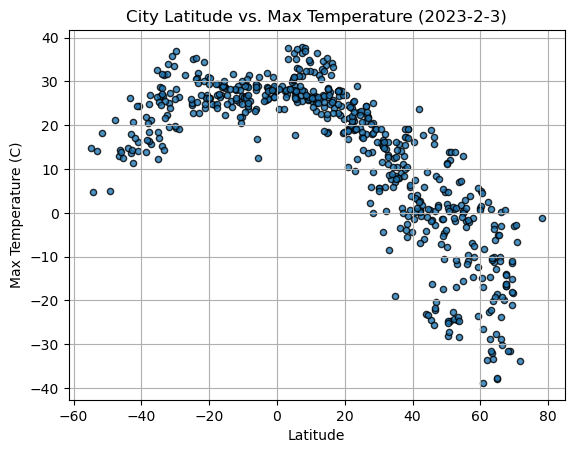

In [14]:
city_data_df.plot(kind="scatter",x=['Lat'], y=['Max Temp'], grid=True, marker="o", alpha=0.8, edgecolors="black")

plt.title("City Latitude vs. Max Temperature (2023-2-3)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")

plt.savefig("output_data/Fig1.png")
plt.show()

#### Latitude Vs. Humidity

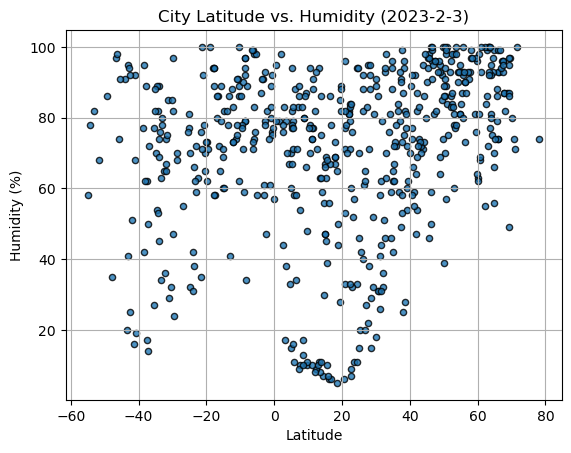

In [15]:
city_data_df.plot(kind="scatter",x=['Lat'], y=['Humidity'], grid=True, marker="o", alpha=0.8, edgecolors="black")

plt.title("City Latitude vs. Humidity (2023-2-3)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

plt.savefig("output_data/Fig2.png")
plt.show()

#### Latitude Vs. Cloudiness

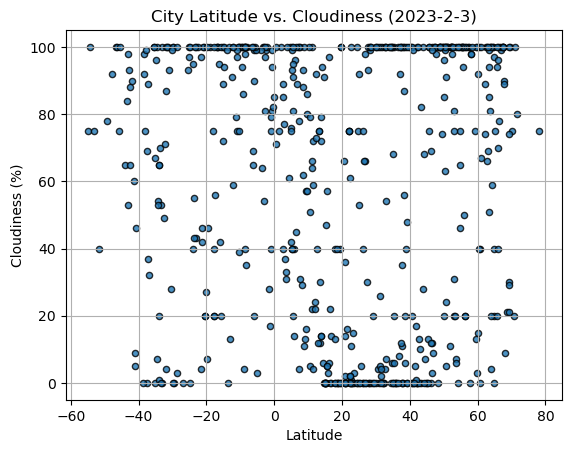

In [16]:
city_data_df.plot(kind="scatter",x=['Lat'], y=['Cloudiness'], grid=True, marker="o", alpha=0.8, edgecolors="black")

plt.title("City Latitude vs. Cloudiness (2023-2-3)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

plt.savefig("output_data/Fig3.png")
plt.show()

#### Latitude vs. Wind Speed Plot

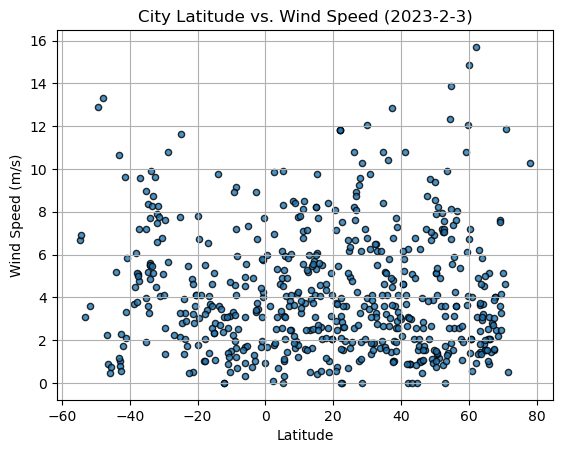

In [17]:
city_data_df.plot(kind="scatter",x=['Lat'], y=['Wind Speed'], grid=True, marker="o", alpha=0.8, edgecolors="black")

plt.title("City Latitude vs. Wind Speed (2023-2-3)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")

plt.savefig("output_data/Fig4.png")
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship

In [22]:
# Define a function to create Linear Regression plots
x_values = []
y_values = []
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))

ValueError: Inputs must not be empty.

In [23]:
northern_hemi_df = city_data_df[city_data_df["Lat"]>=0]
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sinabang,2.4803,96.3801,27.72,76,85,1.76,ID,1707059585
2,isafjordur,66.0755,-23.1240,-2.98,74,100,5.14,IS,1707059586
4,palmer,42.1584,-72.3287,0.65,54,0,3.09,US,1707059588
7,colonia,50.9333,6.9500,12.12,84,100,8.23,DE,1707059590
8,aasiaat,68.7098,-52.8699,-31.59,87,21,2.20,GL,1707059591


In [24]:
southern_hemi_df = city_data_df[city_data_df["Lat"]<0]
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,carnarvon,-24.8667,113.6333,22.72,70,0,11.62,AU,1707059586
3,adamstown,-25.0660,-130.1015,24.71,77,97,2.15,PN,1707059587
5,papatowai,-46.5619,169.4708,12.97,97,100,2.22,NZ,1707059589
6,masterton,-40.9597,175.6575,16.05,92,9,2.08,NZ,1707059398
9,port-aux-francais,-49.3500,70.2167,4.90,86,78,12.88,TF,1707059592


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.8653883976925747


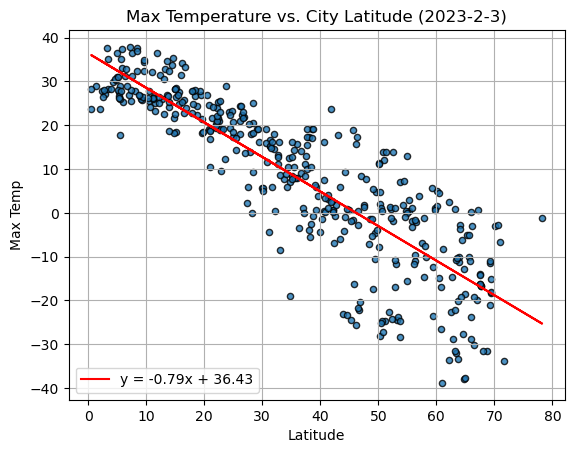

In [25]:
# Linear regression on Northern Hemisphere 

northern_hemi_df.plot(kind="scatter", x='Lat', y='Max Temp', grid=True, marker="o", alpha=0.8, edgecolors="black")

slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
line = slope * northern_hemi_df['Lat'] + intercept
plt.plot(northern_hemi_df['Lat'], line, color='red',label=f'y = {slope:.2f}x + {intercept:.2f}')

print(f'The r-value is: {abs(r_value)}')
plt.title("Max Temperature vs. City Latitude (2023-2-3)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

plt.legend(loc='lower left')
plt.savefig("output_data/Fig5.png")



The r-value is: 0.5387586359615522


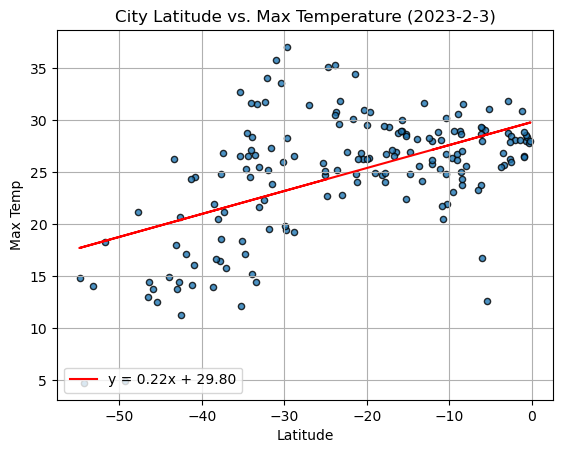

In [26]:
# Linear regression on Southern Hemisphere

southern_hemi_df.plot(kind="scatter", x='Lat', y='Max Temp', grid=True, marker="o", alpha=0.8, edgecolors="black")

slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
line = slope * southern_hemi_df['Lat'] + intercept
plt.plot(southern_hemi_df['Lat'], line, color='red',label=f'y = {slope:.2f}x + {intercept:.2f}')

print(f'The r-value is: {abs(r_value)}')
plt.title("City Latitude vs. Max Temperature (2023-2-3)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

plt.legend(loc='lower left')
plt.savefig("output_data/Fig6.png")



**Discussion about the linear relationship:** The northern hemisphere has a very strong correlation between Max Temp and Latitude. The southern hemisphere has a moderate to strong correlation between Max Temp and Latitude. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.5174184071498577


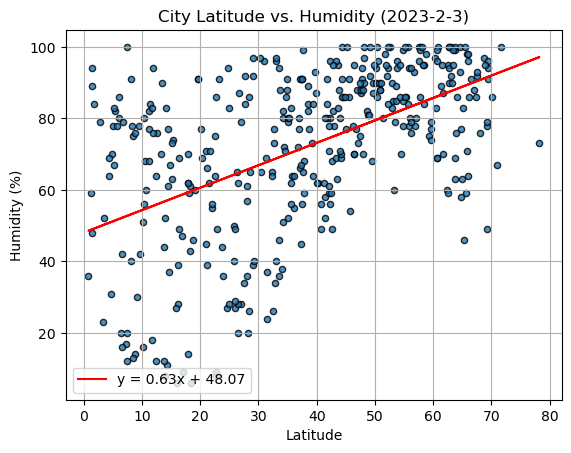

In [123]:
northern_hemi_df.plot(kind="scatter", x='Lat', y='Humidity', grid=True, marker="o", alpha=0.8, edgecolors="black")

slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
line = slope * northern_hemi_df['Lat'] + intercept
plt.plot(northern_hemi_df['Lat'], line, color='red',label=f'y = {slope:.2f}x + {intercept:.2f}')

print(f'The r-value is: {abs(r_value)}')
plt.title("City Latitude vs. Humidity (2023-2-3)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.legend(loc='lower left')
plt.savefig("output_data/Fig7.png")

The r-value is: 0.2997593124131564


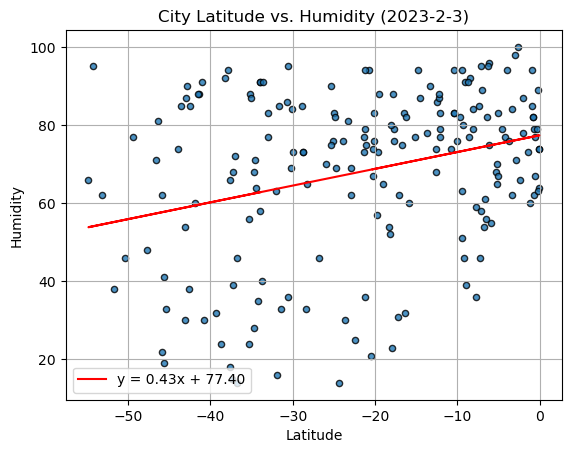

In [122]:
southern_hemi_df.plot(kind="scatter", x='Lat', y='Humidity', grid=True, marker="o", alpha=0.8, edgecolors="black")

slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
line = slope * southern_hemi_df['Lat'] + intercept
plt.plot(southern_hemi_df['Lat'], line, color='red',label=f'y = {slope:.2f}x + {intercept:.2f}')

print(f'The r-value is: {abs(r_value)}')
plt.title("City Latitude vs. Humidity (2023-2-3)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.legend(loc='lower left')
plt.savefig("output_data/Fig8.png")

**Discussion about the linear relationship:** The northern hemisphere has a moderate correlation between City Latitude and Humidity. The southern hemisphere has a weak correlation between City Latitude and Humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.29447066754029605


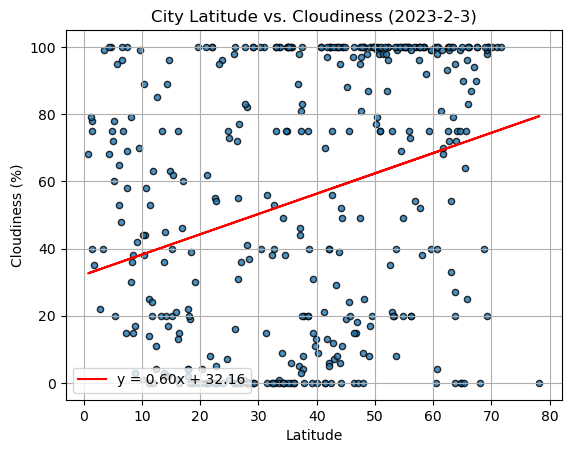

In [121]:
northern_hemi_df.plot(kind="scatter", x='Lat', y='Cloudiness', grid=True, marker="o", alpha=0.8, edgecolors="black")

slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
line = slope * northern_hemi_df['Lat'] + intercept
plt.plot(northern_hemi_df['Lat'], line, color='red',label=f'y = {slope:.2f}x + {intercept:.2f}')

print(f'The r-value is: {abs(r_value)}')
plt.title("City Latitude vs. Cloudiness (2023-2-3)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.legend(loc='lower left')
plt.savefig("output_data/Fig9.png")

The r-value is: 0.33623511806604767


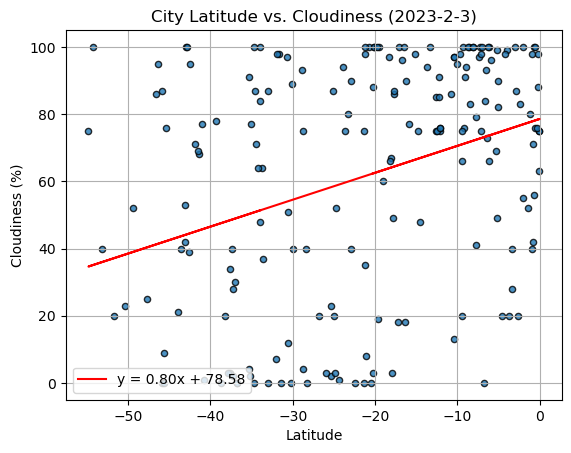

In [120]:
southern_hemi_df.plot(kind="scatter", x='Lat', y='Cloudiness', grid=True, marker="o", alpha=0.8, edgecolors="black")

slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
line = slope * southern_hemi_df['Lat'] + intercept
plt.plot(southern_hemi_df['Lat'], line, color='red',label=f'y = {slope:.2f}x + {intercept:.2f}')

print(f'The r-value is: {abs(r_value)}')
plt.title("City Latitude vs. Cloudiness (2023-2-3)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.legend(loc='lower left')
plt.savefig("output_data/Fig10.png")

**Discussion about the linear relationship:** The northern hemisphere has a weak correlation between City Latitude and Cloudiness. The southern hemisphere has a weak correlation between City Latitude and Cloudiness. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.022892615924657793


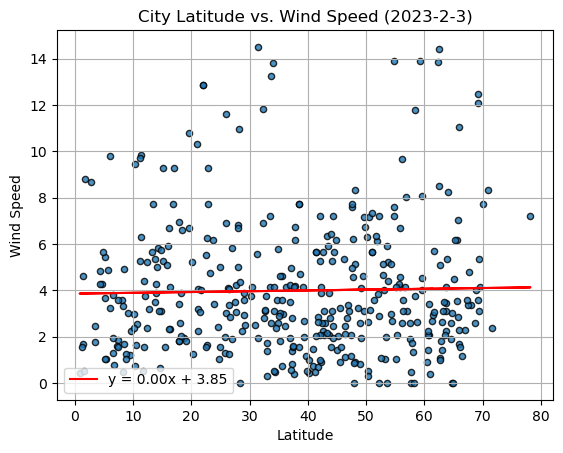

In [118]:
northern_hemi_df.plot(kind="scatter", x='Lat', y='Wind Speed', grid=True, marker="o", alpha=0.8, edgecolors="black")

slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
line = slope * northern_hemi_df['Lat'] + intercept
plt.plot(northern_hemi_df['Lat'], line, color='red',label=f'y = {slope:.2f}x + {intercept:.2f}')

print(f'The r-value is: {abs(r_value)}')
plt.title("City Latitude vs. Wind Speed (2023-2-3)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.legend(loc='lower left')
plt.savefig("output_data/Fig11.png")

The r-value is: 0.24784326566545217


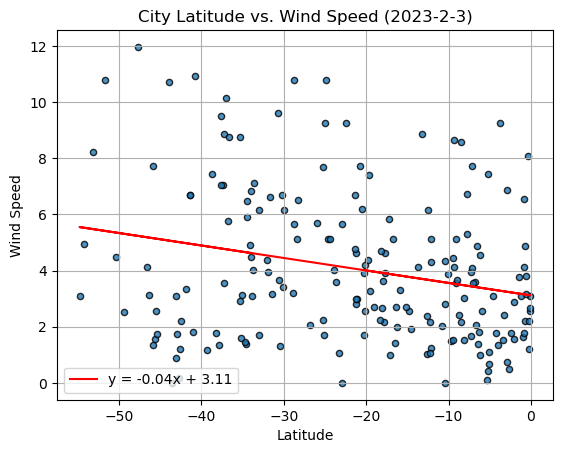

In [117]:
southern_hemi_df.plot(kind="scatter", x='Lat', y='Wind Speed', grid=True, marker="o", alpha=0.8, edgecolors="black")

slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
line = slope * southern_hemi_df['Lat'] + intercept
plt.plot(southern_hemi_df['Lat'], line, color='red',label=f'y = {slope:.2f}x + {intercept:.2f}')

print(f'The r-value is: {abs(r_value)}')
plt.title("City Latitude vs. Wind Speed (2023-2-3)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.legend(loc='lower left')
plt.savefig("output_data/Fig12.png")

**Discussion about the linear relationship:** The northern hemisphere has a very weak correlation between City Latitude and Wind Speed. The southern hemisphere has a very weak correlation between City Latitude and Wind Speed. 